# 3. Analyse Statistique - CAC40 (Données Nettoyées)


## 1. Importation des bibliothèques et chargement des données


In [15]:
# Import required libraries for statistical analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


Libraries imported successfully!
Pandas version: 2.3.2
NumPy version: 2.2.6


In [16]:
# Load the clean CAC40 data (without anomalies)
print("Loading clean CAC40 data...")

try:
    # Load the cleaned data without anomalies
    df = pd.read_parquet('cac40_clean_no_anomalies.parquet')
    print(f"✅ Clean CAC40 dataset loaded successfully!")
    print(f"📊 Shape: {df.shape[0]} rows, {df.shape[1]} columns")
    print(f"📅 Date range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
    
    # Display basic information about the dataset
    print(f"\n📋 Dataset Information:")
    print(f"Columns: {list(df.columns)}")
    print(f"Data types:")
    print(df.dtypes)
    
    # Show first few rows
    print(f"\n📋 First 5 rows:")
    print(df.head().to_string(index=False))
    
    # Basic statistics
    print(f"\n📈 Basic Statistics:")
    print(f"Average Close Price: {df['Close'].mean():.2f}")
    print(f"Min Close Price: {df['Close'].min():.2f}")
    print(f"Max Close Price: {df['Close'].max():.2f}")
    print(f"Average Volume: {df['Volume'].mean():,.0f}")
    print(f"Average Daily Return: {df['Daily_Return'].mean():.4f}")
    print(f"Daily Return Std: {df['Daily_Return'].std():.4f}")
    
except FileNotFoundError:
    print("❌ cac40_clean_no_anomalies.parquet not found!")
    print("Please run the anomaly detection notebook first to create the clean dataset.")
except Exception as e:
    print(f"❌ Error loading data: {e}")

print(f"\n🎯 Ready for statistical analysis!")


Loading clean CAC40 data...
✅ Clean CAC40 dataset loaded successfully!
📊 Shape: 479 rows, 7 columns
📅 Date range: 2023-01-02 to 2025-01-01

📋 Dataset Information:
Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return']
Data types:
Date            datetime64[ns]
Open                   float32
High                   float32
Low                    float32
Close                  float32
Volume                 float32
Daily_Return           float32
dtype: object

📋 First 5 rows:
      Date        Open        High        Low       Close   Volume  Daily_Return
2023-01-02 1001.640015 1004.900024 998.989990 1001.739990 440686.0           NaN
2023-01-03  998.830017 1006.710022 994.859985  998.080017 416463.0     -0.003654
2023-01-04  997.400024 1004.780029 991.119995 1003.080017 345144.0      0.005010
2023-01-05  999.270020 1006.169983 997.809998 1002.380005 978499.0     -0.000698
2023-01-06 1002.390015 1005.520020 995.609985 1003.640015 776999.0      0.001257

📈 Basic Statis

## 2. Calculer les indicateurs du marché

### Moyennes mobiles multiples

In [17]:
# Calculate multiple moving averages
print("=== CALCULATING MOVING AVERAGES ===")

# Short-term moving average (10 days)
df['MA_10'] = df['Close'].rolling(10).mean()

# Long-term moving average (20 days) 
df['MA_20'] = df['Close'].rolling(20).mean()

print(f"✅ Moving averages calculated successfully!")
print(f"📊 MA_10 (10-day moving average): {df['MA_10'].notna().sum()} valid values")
print(f"📊 MA_20 (20-day moving average): {df['MA_20'].notna().sum()} valid values")

# Display basic statistics for moving averages
print(f"\n📈 Moving Average Statistics:")
print(f"MA_10 - Mean: {df['MA_10'].mean():.2f}, Std: {df['MA_10'].std():.2f}")
print(f"MA_20 - Mean: {df['MA_20'].mean():.2f}, Std: {df['MA_20'].std():.2f}")

# Show first few rows with moving averages
print(f"\n📋 First 10 rows with moving averages:")
display_columns = ['Date', 'Close', 'MA_10', 'MA_20']
print(df[display_columns].head(10).to_string(index=False))

# Show last few rows with moving averages
print(f"\n📋 Last 10 rows with moving averages:")
print(df[display_columns].tail(10).to_string(index=False))

print(f"\n🎯 Moving averages ready for analysis!")


=== CALCULATING MOVING AVERAGES ===
✅ Moving averages calculated successfully!
📊 MA_10 (10-day moving average): 470 valid values
📊 MA_20 (20-day moving average): 460 valid values

📈 Moving Average Statistics:
MA_10 - Mean: 998.86, Std: 6.94
MA_20 - Mean: 998.79, Std: 6.87

📋 First 10 rows with moving averages:
      Date       Close       MA_10  MA_20
2023-01-02 1001.739990         NaN    NaN
2023-01-03  998.080017         NaN    NaN
2023-01-04 1003.080017         NaN    NaN
2023-01-05 1002.380005         NaN    NaN
2023-01-06 1003.640015         NaN    NaN
2023-01-09  999.919983         NaN    NaN
2023-01-10 1000.530029         NaN    NaN
2023-01-11 1006.039978         NaN    NaN
2023-01-12 1004.690002         NaN    NaN
2023-01-13 1002.679993 1002.278003    NaN

📋 Last 10 rows with moving averages:
      Date       Close       MA_10       MA_20
2024-12-16 1001.039978 1003.347003 1004.356006
2024-12-19 1000.750000 1002.785004 1003.990005
2024-12-20  999.330017 1002.063007 1003.561505


### Momentum

In [18]:
# Calculate Momentum (20-day)
print("=== CALCULATING MOMENTUM ===")

# Long-term momentum (20 days): difference between current price and price 20 days ago
df['Momentum_20'] = df['Close'] - df['Close'].shift(20)

print(f"✅ Momentum calculated successfully!")
print(f"📊 Momentum_20 (20-day momentum): {df['Momentum_20'].notna().sum()} valid values")

# Display basic statistics for momentum
print(f"\n📈 Momentum Statistics:")
print(f"Momentum_20 - Mean: {df['Momentum_20'].mean():.2f}")
print(f"Momentum_20 - Std: {df['Momentum_20'].std():.2f}")
print(f"Momentum_20 - Min: {df['Momentum_20'].min():.2f}")
print(f"Momentum_20 - Max: {df['Momentum_20'].max():.2f}")

# Show momentum interpretation
positive_momentum = (df['Momentum_20'] > 0).sum()
negative_momentum = (df['Momentum_20'] < 0).sum()
print(f"\n📊 Momentum Analysis:")
print(f"Positive momentum days: {positive_momentum} ({positive_momentum/df['Momentum_20'].notna().sum()*100:.1f}%)")
print(f"Negative momentum days: {negative_momentum} ({negative_momentum/df['Momentum_20'].notna().sum()*100:.1f}%)")

# Show first few rows with momentum
print(f"\n📋 First 10 rows with momentum:")
display_columns = ['Date', 'Close', 'Momentum_20']
print(df[display_columns].head(10).to_string(index=False))

# Show last few rows with momentum
print(f"\n📋 Last 10 rows with momentum:")
print(df[display_columns].tail(10).to_string(index=False))

print(f"\n🎯 Momentum ready for analysis!")


=== CALCULATING MOMENTUM ===
✅ Momentum calculated successfully!
📊 Momentum_20 (20-day momentum): 459 valid values

📈 Momentum Statistics:
Momentum_20 - Mean: 0.03
Momentum_20 - Std: 5.22
Momentum_20 - Min: -12.80
Momentum_20 - Max: 14.68

📊 Momentum Analysis:
Positive momentum days: 216 (47.1%)
Negative momentum days: 242 (52.7%)

📋 First 10 rows with momentum:
      Date       Close  Momentum_20
2023-01-02 1001.739990          NaN
2023-01-03  998.080017          NaN
2023-01-04 1003.080017          NaN
2023-01-05 1002.380005          NaN
2023-01-06 1003.640015          NaN
2023-01-09  999.919983          NaN
2023-01-10 1000.530029          NaN
2023-01-11 1006.039978          NaN
2023-01-12 1004.690002          NaN
2023-01-13 1002.679993          NaN

📋 Last 10 rows with momentum:
      Date       Close  Momentum_20
2024-12-16 1001.039978    -3.000000
2024-12-19 1000.750000    -7.320007
2024-12-20  999.330017    -8.570007
2024-12-23  996.880005    -6.710022
2024-12-24 1003.590027    -0

## 3. Sauvegarde des données

In [19]:
# Export enriched data with moving averages and momentum
print("=== EXPORTING ENRICHED DATA ===")

# Check if we have the enriched data
if 'df' in locals() and len(df) > 0:
    # Create export dataframe with all columns
    export_df = df.copy()
    
    # Sort by date to ensure proper order
    export_df = export_df.sort_values('Date').reset_index(drop=True)
    
    # Export to parquet file
    output_filename = 'cac40_enriched_analysis.parquet'
    export_df.to_parquet(output_filename, index=False)
    
    print(f"✅ Enriched data exported successfully!")
    print(f"📁 File: {output_filename}")
    print(f"📊 Shape: {export_df.shape[0]} rows, {export_df.shape[1]} columns")
    print(f"📅 Date range: {export_df['Date'].min().strftime('%Y-%m-%d')} to {export_df['Date'].max().strftime('%Y-%m-%d')}")
    
    # Show all columns that were exported
    print(f"\n📋 All exported columns:")
    for i, col in enumerate(export_df.columns, 1):
        print(f"{i:2d}. {col}")
    
    # Show first few rows of exported data
    print(f"\n📋 First 5 rows of exported data:")
    print(export_df.head().to_string(index=False))
    
    # Show last few rows of exported data
    print(f"\n📋 Last 5 rows of exported data:")
    print(export_df.tail().to_string(index=False))
    
    # Basic statistics of exported data
    print(f"\n📈 Basic Statistics of Exported Data:")
    print(f"Average Close Price: {export_df['Close'].mean():.2f}")
    print(f"Min Close Price: {export_df['Close'].min():.2f}")
    print(f"Max Close Price: {export_df['Close'].max():.2f}")
    print(f"Average Volume: {export_df['Volume'].mean():,.0f}")
    print(f"Average Daily Return: {export_df['Daily_Return'].mean():.4f}")
    print(f"Average MA_10: {export_df['MA_10'].mean():.2f}")
    print(f"Average MA_20: {export_df['MA_20'].mean():.2f}")
    print(f"Average Momentum_20: {export_df['Momentum_20'].mean():.2f}")
    
    # Show data quality information
    print(f"\n📊 Data Quality Information:")
    print(f"Total rows: {len(export_df)}")
    print(f"MA_10 valid values: {export_df['MA_10'].notna().sum()}")
    print(f"MA_20 valid values: {export_df['MA_20'].notna().sum()}")
    print(f"Momentum_20 valid values: {export_df['Momentum_20'].notna().sum()}")
    print(f"Missing values in MA_10: {export_df['MA_10'].isna().sum()}")
    print(f"Missing values in MA_20: {export_df['MA_20'].isna().sum()}")
    print(f"Missing values in Momentum_20: {export_df['Momentum_20'].isna().sum()}")
    
else:
    print("❌ No enriched data available. Please run the moving averages and momentum calculations first.")
    if 'df' in locals():
        print(f"Original data available: {len(df)} rows")
        print("Available columns:", list(df.columns))
    else:
        print("No data loaded.")

print(f"\n🎯 Export completed! The file 'cac40_enriched_analysis.parquet' contains the CAC40 data with moving averages and momentum indicators.")


=== EXPORTING ENRICHED DATA ===
✅ Enriched data exported successfully!
📁 File: cac40_enriched_analysis.parquet
📊 Shape: 479 rows, 10 columns
📅 Date range: 2023-01-02 to 2025-01-01

📋 All exported columns:
 1. Date
 2. Open
 3. High
 4. Low
 5. Close
 6. Volume
 7. Daily_Return
 8. MA_10
 9. MA_20
10. Momentum_20

📋 First 5 rows of exported data:
      Date        Open        High        Low       Close   Volume  Daily_Return  MA_10  MA_20  Momentum_20
2023-01-02 1001.640015 1004.900024 998.989990 1001.739990 440686.0           NaN    NaN    NaN          NaN
2023-01-03  998.830017 1006.710022 994.859985  998.080017 416463.0     -0.003654    NaN    NaN          NaN
2023-01-04  997.400024 1004.780029 991.119995 1003.080017 345144.0      0.005010    NaN    NaN          NaN
2023-01-05  999.270020 1006.169983 997.809998 1002.380005 978499.0     -0.000698    NaN    NaN          NaN
2023-01-06 1002.390015 1005.520020 995.609985 1003.640015 776999.0      0.001257    NaN    NaN          NaN

📋 L

## 4. Prédiction statistique

### Règle de prédiction

In [23]:
def predict_price_direction_corrected(df, momentum_days=5):
    """
    Predict price direction based on:
    1. MA_10 > MA_20 (bullish trend)
    2. Price has risen compared to a few days ago (positive momentum)
    
    IMPORTANT: Predictions only start from day 20 since we need MA_20 to be available
    
    Parameters:
    - df: DataFrame with MA_10, MA_20, and Close columns
    - momentum_days: Number of days to look back for momentum (default: 5)
    
    Returns:
    - DataFrame with prediction columns
    """
    print(f"=== CORRECTED PRICE PREDICTION ANALYSIS ===")
    print(f"Note: Predictions only start from day 20 (when MA_20 becomes available)")
    
    # Create a copy to avoid modifying original
    df_pred = df.copy()
    
    # Calculate short-term momentum (price change over momentum_days)
    df_pred['Price_Momentum'] = df_pred['Close'] - df_pred['Close'].shift(momentum_days)
    
    # Rule 1: MA_10 > MA_20 (bullish trend) - only where MA_20 is available
    df_pred['MA_Bullish'] = (df_pred['MA_10'] > df_pred['MA_20']) & df_pred['MA_20'].notna()
    
    # Rule 2: Price has risen compared to a few days ago (positive momentum)
    df_pred['Momentum_Bullish'] = df_pred['Price_Momentum'] > 0
    
    # Combined prediction rule - only apply where we have valid MA_20 data
    # Predictions start from day 20 (when MA_20 becomes available)
    df_pred['Price_Prediction'] = np.where(
        df_pred['MA_20'].notna(),  # Only where MA_20 is available
        df_pred['MA_Bullish'] & df_pred['Momentum_Bullish'],
        np.nan  # No prediction for days without MA_20
    )
    
    # Convert boolean to string for clarity
    df_pred['Prediction_Label'] = df_pred['Price_Prediction'].map({
        True: 'RISE',
        False: 'FALL'
    })
    
    return df_pred

# Apply the corrected prediction function
print("Applying corrected price prediction function...")
df_with_predictions_corrected = predict_price_direction_corrected(df, momentum_days=5)

# Analyze corrected prediction results
print(f"\n📊 CORRECTED PREDICTION ANALYSIS:")
valid_predictions = df_with_predictions_corrected['Price_Prediction'].notna().sum()
print(f"Total predictions made: {valid_predictions}")

# Count predictions
rise_predictions = (df_with_predictions_corrected['Price_Prediction'] == True).sum()
fall_predictions = (df_with_predictions_corrected['Price_Prediction'] == False).sum()
total_predictions = rise_predictions + fall_predictions

print(f"RISE predictions: {rise_predictions} ({rise_predictions/total_predictions*100:.1f}%)")
print(f"FALL predictions: {fall_predictions} ({fall_predictions/total_predictions*100:.1f}%)")

# Show conditions breakdown
ma_bullish_count = df_with_predictions_corrected['MA_Bullish'].sum()
momentum_bullish_count = df_with_predictions_corrected['Momentum_Bullish'].sum()

print(f"\n📈 CONDITION ANALYSIS:")
print(f"MA_10 > MA_20 (bullish trend): {ma_bullish_count} days ({ma_bullish_count/total_predictions*100:.1f}%)")
print(f"Price momentum positive: {momentum_bullish_count} days ({momentum_bullish_count/total_predictions*100:.1f}%)")

# Show recent predictions
print(f"\n📋 RECENT PREDICTIONS (Last 10 days):")
recent_predictions = df_with_predictions_corrected[['Date', 'Close', 'MA_10', 'MA_20', 'Price_Momentum', 'Prediction_Label']].tail(10)
print(recent_predictions.to_string(index=False))

# Show prediction accuracy (if we have future data)
print(f"\n📊 PREDICTION SUMMARY:")
print(f"Prediction rule: RISE if (MA_10 > MA_20) AND (Price_Momentum > 0)")
print(f"Otherwise: FALL")
print(f"Total valid predictions: {total_predictions}")
print(f"Predictions start from day 20 (when MA_20 becomes available)")

print(f"\n🎯 Corrected price prediction analysis completed!")


Applying corrected price prediction function...
=== CORRECTED PRICE PREDICTION ANALYSIS ===
Note: Predictions only start from day 20 (when MA_20 becomes available)

📊 CORRECTED PREDICTION ANALYSIS:
Total predictions made: 460
RISE predictions: 126 (27.4%)
FALL predictions: 334 (72.6%)

📈 CONDITION ANALYSIS:
MA_10 > MA_20 (bullish trend): 207 days (45.0%)
Price momentum positive: 240 days (52.2%)

📋 RECENT PREDICTIONS (Last 10 days):
      Date       Close       MA_10       MA_20  Price_Momentum Prediction_Label
2024-12-16 1001.039978 1003.347003 1004.356006       -3.660034              NaN
2024-12-19 1000.750000 1002.785004 1003.990005       -5.340027              NaN
2024-12-20  999.330017 1002.063007 1003.561505       -2.510010              NaN
2024-12-23  996.880005 1001.658008 1003.226004       -2.239990              NaN
2024-12-24 1003.590027 1001.662012 1003.219006        0.309998              NaN
2024-12-26 1002.219971 1001.414008 1003.005005        1.179993              NaN
202

### Comparaison aux données réelles

=== EVALUATING PREDICTION ACCURACY ===
📊 PREDICTION ACCURACY:
Total predictions: 460
Correct predictions: 193
Accuracy: 41.96%


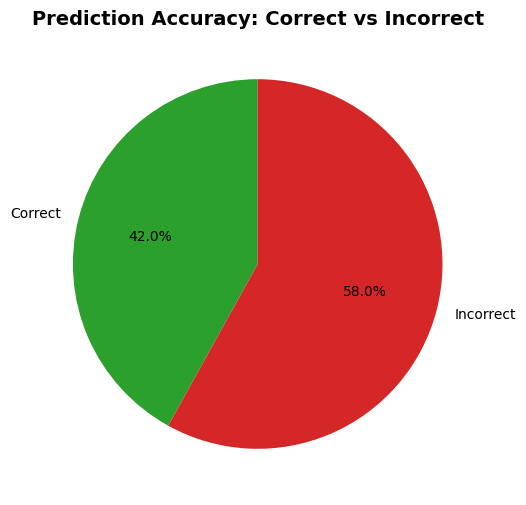


🎯 Accuracy analysis completed!


In [25]:
# Evaluate prediction accuracy
print("=== EVALUATING PREDICTION ACCURACY ===")

if 'df_with_predictions_corrected' in locals():
    # Calculate actual price movement
    df_accuracy = df_with_predictions_corrected.copy()
    df_accuracy['Actual_Next_Return'] = df_accuracy['Close'].pct_change().shift(-1)
    df_accuracy['Actual_Direction'] = df_accuracy['Actual_Next_Return'] > 0
    df_accuracy['Prediction_Correct'] = df_accuracy['Price_Prediction'] == df_accuracy['Actual_Direction']
    
    # Remove NaN values
    df_accuracy_clean = df_accuracy.dropna(subset=['Price_Prediction', 'Actual_Direction'])
    
    # Calculate accuracy
    total_predictions = len(df_accuracy_clean)
    correct_predictions = df_accuracy_clean['Prediction_Correct'].sum()
    accuracy_percentage = (correct_predictions / total_predictions) * 100
    
    print(f"📊 PREDICTION ACCURACY:")
    print(f"Total predictions: {total_predictions}")
    print(f"Correct predictions: {correct_predictions}")
    print(f"Accuracy: {accuracy_percentage:.2f}%")
    
    # Create pie chart for prediction accuracy
    plt.figure(figsize=(8, 6))
    correct_count = df_accuracy_clean['Prediction_Correct'].sum()
    incorrect_count = total_predictions - correct_count
    
    plt.pie([correct_count, incorrect_count], 
            labels=['Correct', 'Incorrect'], 
            autopct='%1.1f%%', 
            colors=['#2ca02c', '#d62728'],
            startangle=90)
    plt.title('Prediction Accuracy: Correct vs Incorrect', fontsize=14, fontweight='bold')
    plt.show()
    
    print(f"\n🎯 Accuracy analysis completed!")
    
else:
    print("❌ No corrected predictions data available")

=== VISUALISATION DES PRÉDICTIONS VS COURS RÉEL ===


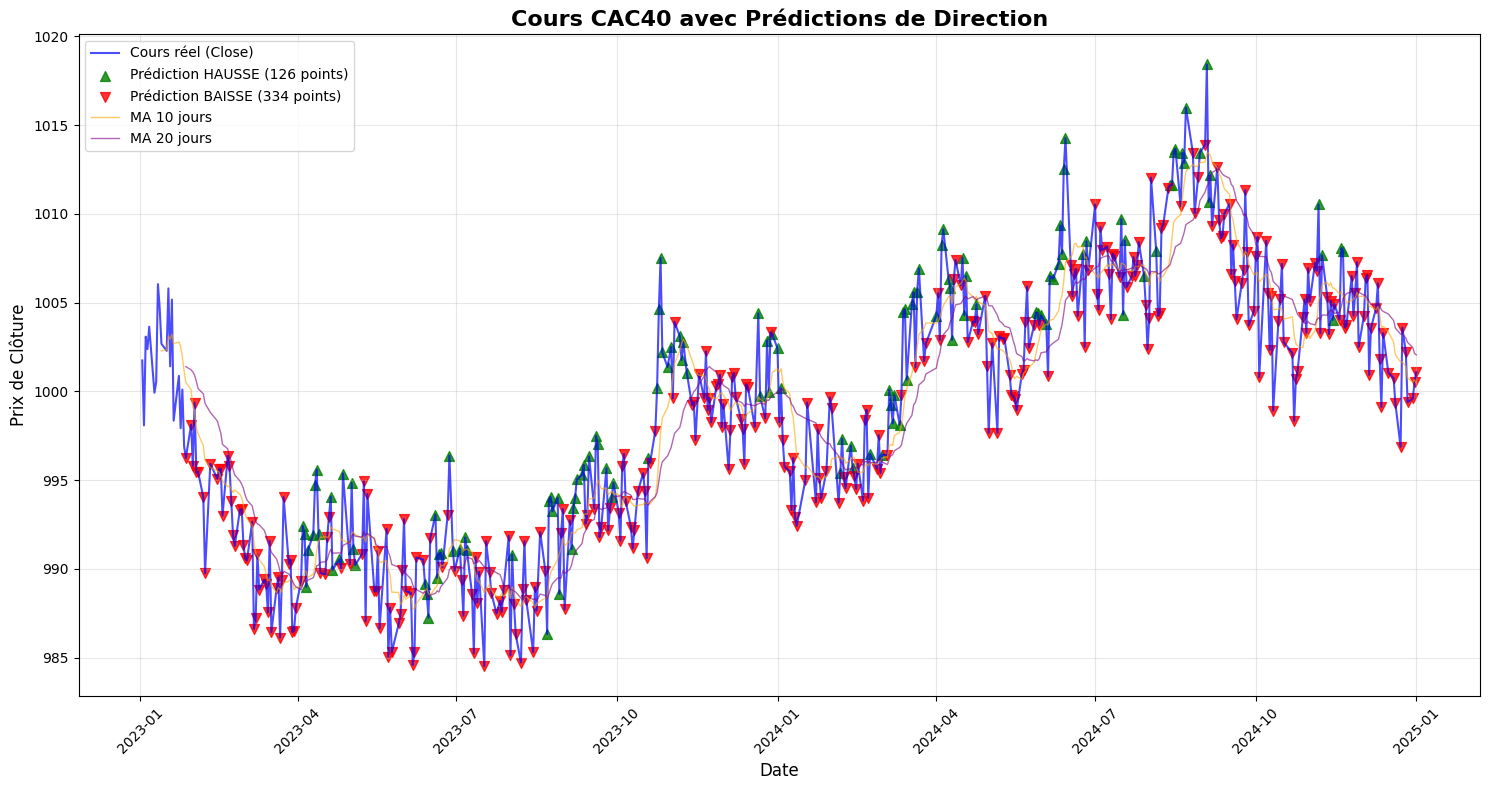


📊 STATISTIQUES DES PRÉDICTIONS:
Total prédictions: 460
Prédictions HAUSSE: 126 (27.4%)
Prédictions BAISSE: 334 (72.6%)

📋 EXEMPLES RÉCENTS (Derniers 10 jours):
      Date       Close  Price_Prediction Prediction_Label
2024-12-16 1001.039978               0.0              NaN
2024-12-19 1000.750000               0.0              NaN
2024-12-20  999.330017               0.0              NaN
2024-12-23  996.880005               0.0              NaN
2024-12-24 1003.590027               0.0              NaN
2024-12-26 1002.219971               0.0              NaN
2024-12-27  999.390015               0.0              NaN
2024-12-30  999.599976               0.0              NaN
2024-12-31 1000.530029               0.0              NaN
2025-01-01 1001.080017               0.0              NaN

🎯 Visualisation des prédictions terminée!


In [22]:
# Visualisation des prédictions vs cours réel
print("=== VISUALISATION DES PRÉDICTIONS VS COURS RÉEL ===")

if 'df_with_predictions_corrected' in locals():
    # Créer le graphique
    plt.figure(figsize=(15, 8))
    
    # Tracer le cours réel
    plt.plot(df_with_predictions_corrected['Date'], 
             df_with_predictions_corrected['Close'], 
             linewidth=1.5, color='blue', alpha=0.7, label='Cours réel (Close)')
    
    # Filtrer les données avec prédictions valides
    df_with_predictions_clean = df_with_predictions_corrected.dropna(subset=['Price_Prediction'])
    
    # Séparer les prédictions de hausse et de baisse
    rise_predictions = df_with_predictions_clean[df_with_predictions_clean['Price_Prediction'] == True]
    fall_predictions = df_with_predictions_clean[df_with_predictions_clean['Price_Prediction'] == False]
    
    # Marquer les prédictions de hausse (RISE) en vert
    if len(rise_predictions) > 0:
        plt.scatter(rise_predictions['Date'], 
                   rise_predictions['Close'], 
                   color='green', s=50, alpha=0.8, 
                   label=f'Prédiction HAUSSE ({len(rise_predictions)} points)', 
                   marker='^')
    
    # Marquer les prédictions de baisse (FALL) en rouge
    if len(fall_predictions) > 0:
        plt.scatter(fall_predictions['Date'], 
                   fall_predictions['Close'], 
                   color='red', s=50, alpha=0.8, 
                   label=f'Prédiction BAISSE ({len(fall_predictions)} points)', 
                   marker='v')
    
    # Ajouter les moyennes mobiles pour référence
    plt.plot(df_with_predictions_corrected['Date'], 
             df_with_predictions_corrected['MA_10'], 
             linewidth=1, color='orange', alpha=0.6, label='MA 10 jours')
    plt.plot(df_with_predictions_corrected['Date'], 
             df_with_predictions_corrected['MA_20'], 
             linewidth=1, color='purple', alpha=0.6, label='MA 20 jours')
    
    # Configuration du graphique
    plt.title('Cours CAC40 avec Prédictions de Direction', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Prix de Clôture', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    # Ajuster la mise en page
    plt.tight_layout()
    plt.show()
    
    # Statistiques des prédictions
    print(f"\n📊 STATISTIQUES DES PRÉDICTIONS:")
    print(f"Total prédictions: {len(df_with_predictions_clean)}")
    print(f"Prédictions HAUSSE: {len(rise_predictions)} ({len(rise_predictions)/len(df_with_predictions_clean)*100:.1f}%)")
    print(f"Prédictions BAISSE: {len(fall_predictions)} ({len(fall_predictions)/len(df_with_predictions_clean)*100:.1f}%)")
    
    # Afficher quelques exemples récents
    print(f"\n📋 EXEMPLES RÉCENTS (Derniers 10 jours):")
    recent_examples = df_with_predictions_clean[['Date', 'Close', 'Price_Prediction', 'Prediction_Label']].tail(10)
    print(recent_examples.to_string(index=False))
    
    print(f"\n🎯 Visualisation des prédictions terminée!")
    
else:
    print("❌ Aucune donnée de prédiction corrigée disponible")